Intercepción (a): 622.0319530489337
Pendiente (b): -0.012485710054130692
Ecuación de regresión lineal: Y = 622.0319530489337 + -0.012485710054130692 * X


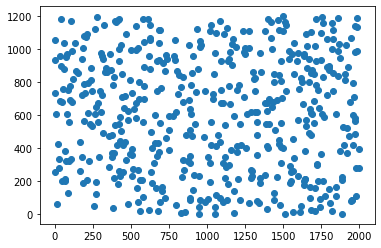

In [106]:
import numpy as np, matplotlib.pyplot as plt, random
from sklearn.linear_model import LinearRegression

# Datos de entrada

random.seed(399)
X = np.random.randint(2000,size=500).reshape(-1,1)
Y = np.random.randint(1200,size=500)


#graficar

plt.scatter(X,Y)

# Crear el objeto del modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo con los datos
modelo.fit(X, Y)

# Obtener los coeficientes del modelo
a = modelo.intercept_
b = modelo.coef_[0]

# Imprimir los resultados
print("Intercepción (a):", a)
print("Pendiente (b):", b)
print("Ecuación de regresión lineal: Y =", a, "+", b, "* X")


El mismo modelo pero dividiendo los datos en entrenamiento y en prueba.

In [107]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Datos de entrada
X = np.random.randint(2000,size=500).reshape(-1,1)
Y = np.random.randint(1200,size=500)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Crear el objeto del modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train, Y_train)

# Obtener los coeficientes del modelo
a = model.intercept_
b = model.coef_[0]

# Imprimir los resultados
print("Intercepción (a):", a)
print("Pendiente (b):", b)
print("Ecuación de regresión lineal: Y =", a, "+", b, "* X")

# Evaluar el modelo en los datos de prueba
Y_pred = model.predict(X_test)
mse = np.mean((Y_pred - Y_test) ** 2)
print("Error cuadrático medio (MSE):", mse)


Intercepción (a): 637.7560647897079
Pendiente (b): -0.012862081343104478
Ecuación de regresión lineal: Y = 637.7560647897079 + -0.012862081343104478 * X
Error cuadrático medio (MSE): 119064.002125385


Un ejemplo del descenso del gradiente usando matrices.

In [162]:
import numpy as np

# Datos de entrada
Y = np.array([0, 1, 2, 3, 4, 5, 6])
X = np.array([4, 5, 6, 8, 9, 10, 15])

# Función de costo (Mean Squared Error)
def func_cost(X, Y, theta):
    m = len(Y)
    prediccion = X.dot(theta)
    cost = (1/(2*m)) * np.sum((prediccion - Y)**2)
    return cost

# Descenso del gradiente
def gradiente_descent(X, Y, theta, tasa_aprendizaje, iteraciones):
    m = len(Y)
    costs = []
    for i in range(iteraciones):
        prediccion = X.dot(theta)
        error = prediccion - Y
        gradiente = (1/m) * X.T.dot(error)
        theta -= tasa_aprendizaje * gradiente
        cost = compute_cost(X, Y, theta)
        costs.append(cost)
    return theta, costs

# Agregar columna de unos a X para el término independiente
X = np.c_[np.ones((len(X), 1)), X]

# Inicializar parámetros y hiperparámetros
theta = np.zeros(X.shape[1])
tasa_aprendizaje = 0.01
num_iterations = 1000

# Ejecutar el descenso del gradiente
theta, costs = gradiente_descent(X, Y, theta, tasa_aprendizaje, num_iterations)

# Imprimir los resultados
print("Intercepción (a):", theta[0])
print("Pendiente (b):", theta[1])


Intercepción (a): -1.1720955442017957
Pendiente (b): 0.518777460183131


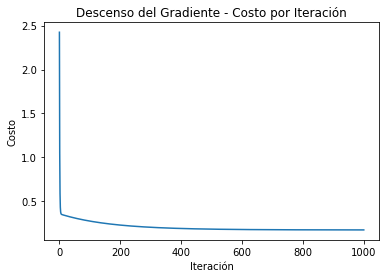

In [132]:
plt.plot(range(num_iterations), costs)
plt.xlabel('Iteración')
plt.ylabel('Costo')
plt.title('Descenso del Gradiente - Costo por Iteración')
plt.show()

Si lo comparamos con el modelo de scikit-learn:

In [137]:
X = np.array([0, 1, 2, 3, 4, 5, 6]).reshape(-1,1)
Y = np.array([4, 5, 6, 8, 9, 10, 15])

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Crear el objeto del modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train, Y_train)

# Obtener los coeficientes del modelo
a = model.intercept_
b = model.coef_[0]

# Imprimir los resultados
print("Intercepción (a):", a)
print("Pendiente (b):", b)
print("Ecuación de regresión lineal: Y =", a, "+", b, "* X")

# Evaluar el modelo en los datos de prueba
Y_pred = model.predict(X_test)
mse = np.mean((Y_pred - Y_test) ** 2)
print("Error cuadrático medio (MSE):", mse)


Intercepción (a): 1.1428571428571423
Pendiente (b): 2.2285714285714286
Ecuación de regresión lineal: Y = 1.1428571428571423 + 2.2285714285714286 * X
Error cuadrático medio (MSE): 5.346666666666667


Notar que es importante definir adecuadamente el hiperparámetro para que el modelo alcance los parámetros óptimos.